### Τεχνολογίες Κινητού Υπολογισμού 
με Μηχανική Μάθηση
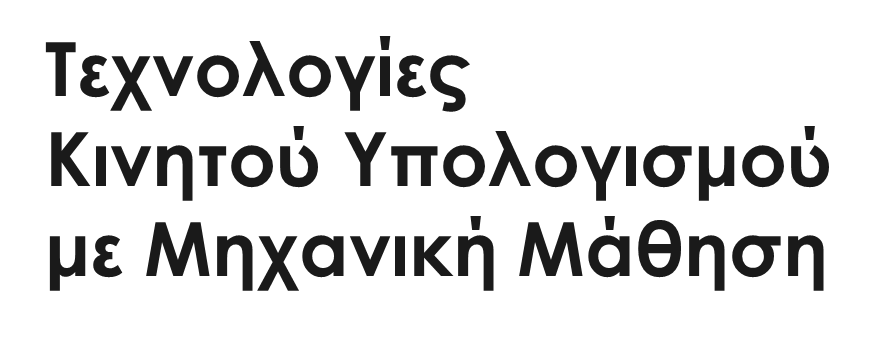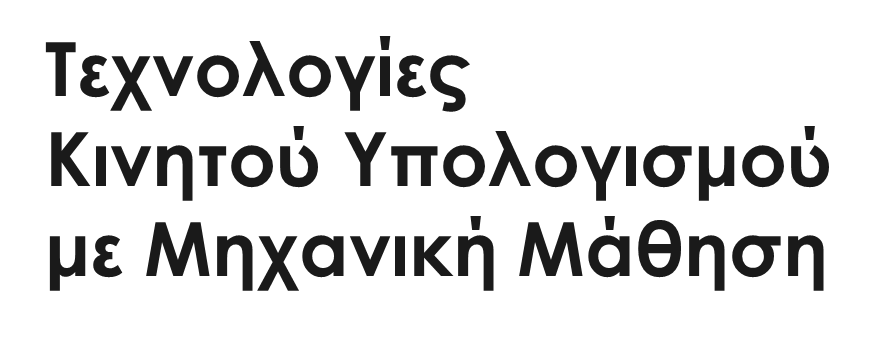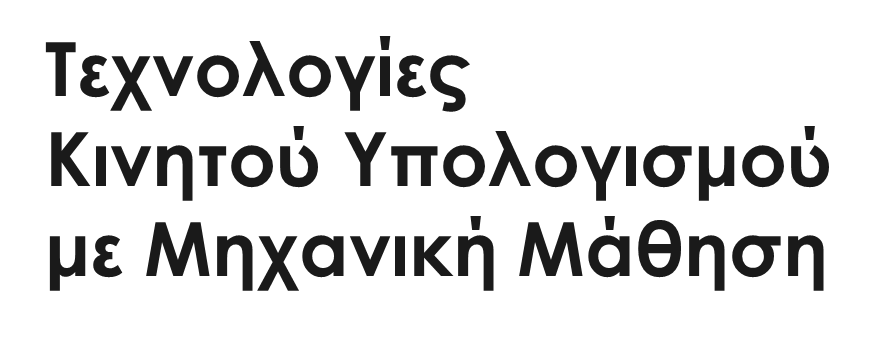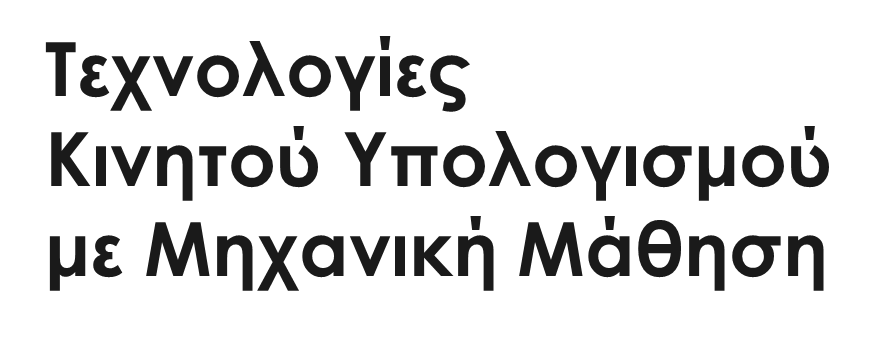
#### 1η Εργαστηριακή Άσκηση 

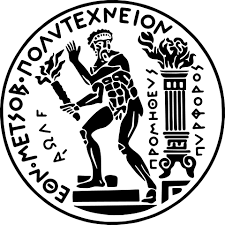

Σχολή Ηλεκτρολόγων Μηχανικών και Μηχανικών Υπολογιστών

Εργαστήρι Ευφυών Επικοινωνιών και Δικτύων Ευρείας Ζώνης

Εθνικό Μετσόβιο Πολυτεχνείο

9ο εξάμηνο

Ακ. Έτος 2024-2025



 `⚠️  Παρακαλείστε να μην δημοσιεύσετε τις απαντήσεις και υλοποιήσεις των εργαστηριακών ασκήσεων στο διαδίκτυο. Ο λόγος είναι η πιθανή επανάληψη των συγκεκριμένων ασκήσεων σε επόμενα ακαδημαικά έτη.`

 `⚠️  Τα χαρακτηριστικά του συνόλου δεδομένων που σας δόθηκαν μπορούν φυσικά να τροποποιηθούν με χρήση στατιστικών μεθόφων ή ακόμα και να παραλειφθούν. Ωστόσο, σε καμία περίπτωση, το σύνολο δεδομένων δεν πρέπει να εμπλουτισθεί με επιπλέον εγγραφές. Πιθανές τέτοιες ενέργειες θα κοστίσουν στην τελική βαθμολόγηση της εργασίας σας.`

Ονοματεπώνυμο φοιτητή: Σπανάκης Παναγιώτης, Ιωακείμ Ελ-Χαττάμπ-Μπριστογιάννης   

Α.Μ.: 03400274, 03400249

### 1. Εισαγωγή συνόλου δεδομένων

Η κάθε ομάδα μπορεί να κατεβάσει το προσωποποιημένο σύνολο δεδομένων για το training-(validation)-test από [εδώ](https://drive.google.com/drive/folders/1lO6elfOldaqSw7k-UWvZBZTWKdmisp5b?usp=sharing).



1.α. Φορτώστε το σύνολο δεδομένων στο notebook σας.

Πρώτα κάνουμε import τις βιβλιοθήκες που θα χρειαστούμε.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [2]:
df = pd.read_csv('dataset_new(in).csv')

1.β. Τυπώστε τις πρώτες 5 ή 10 γραμμές του dataset για να δείτε ότι έχει φορτωθεί όπως πρέπει

In [3]:
df.head()

,X,Y,base_station_user,sector_of_BS_user,sector_user,ModulationType,Power_W_,BS_UEDistance_km_,BS_UEAngle_degrees_,Throughput_Mbps_
0,-1538.494704,1229.952836,10,1,28,QPSK,0.176421,2.175760,195.063406,379.315339
1,-1392.160776,1583.572523,9,1,25,16-QAM,0.053331,1.968813,326.605415,299.266046
2,34.900399,-1440.542036,1,1,1,QPSK,0.000312,0.049357,347.032825,1161.318447
3,-1482.404758,1613.021019,9,1,25,16-QAM,0.125557,2.096437,152.344674,814.071594
4,1451.921185,521.828373,12,2,35,64-QAM,0.017777,2.053327,314.814695,1192.715985


### 2. Διερευνητική ανάλυση δεδομένων -Exploratory Data Analysis (EDA) 
Με βάση το notebook της παρουσίασης της 2ης εργαστηριακής άσκησης δημιουργήστε code cells με τις κατάλληλες τεχνικές EDA για την κατανόηση του συνόλου δεδομένων. Συνίσταται η χρήση text cells για επεξήγηση των αποτελεσμάτων της EDA. 

Χρησιμοποιώντας τις κατάλληλες μεθόδους παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. το πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων (είναι ισοροππημένο το σύνολο δεδομένων;),

2β. το είδος των χαρακτηριστικών του συνόλου δεδομένων,  

2γ. τις ετικέτες των χαρακτηριστικών,

2δ. το πλήθος των κατηγοριών, 

2ε. πόσα δείγματα ανήκουν σε κάθε κατηγορία,

2στ. τη συσχέτιση μεταξύ των δεδομένων,

2ζ. οποιαδήποτε άλλη πληροφορία πιστεύετε ότι είναι χρήσιμη για την κατανόηση του συνόλου δεδομένων.

Πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων

In [4]:
df.shape

(10075, 10)

Είδος των χαρακτηριστικών του συνόλου δεδομένων

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10075 entries, 0 to 10074
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    10075 non-null  float64
 1   Y                    10075 non-null  float64
 2   base_station_user    10075 non-null  int64  
 3   sector_of_BS_user    10075 non-null  int64  
 4   sector_user          10075 non-null  int64  
 5   ModulationType       10075 non-null  object 
 6   Power_W_             10075 non-null  float64
 7   BS_UEDistance_km_    10075 non-null  float64
 8   BS_UEAngle_degrees_  10075 non-null  float64
 9   Throughput_Mbps_     10075 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 787.2+ KB


Ετικέτες των χαρακτηριστικών

In [6]:
df.columns

Index(['X', 'Y', 'base_station_user', 'sector_of_BS_user', 'sector_user',
       'ModulationType', 'Power_W_', 'BS_UEDistance_km_',
       'BS_UEAngle_degrees_', 'Throughput_Mbps_'],
      dtype='object')

Πλήθος των κατηγοριών

Ας δούμε κάποια βασικά στατιστικά στοιχεία για τη target μεταβλητή.

In [7]:
# We need to create balanced categories for the Throughput_Mbps_ column
df['Throughput_Mbps_'].describe()

count    10075.000000
mean       813.887653
std        399.745375
min        117.021646
25%        473.088025
50%        811.654472
75%       1160.667322
max       1499.884142
Name: Throughput_Mbps_, dtype: float64

Θα δημιουργήσουμε 3 ισοκατανεμημένες κατηγορίες για την target μεταβλητή.

In [8]:
# We will create 3 categories for the Throughput_Mbps_ column
# Low = 0-33
# Medium = 33-66
# High = 66-100
# Where 0 is the 0 quantile and 100 is the 100 quantile
df['Throughput_Mbps_'] = pd.qcut(df['Throughput_Mbps_'], q=[0, .33, 0.66 , 1], labels=False)

df['Throughput_Mbps_'].value_counts()

Throughput_Mbps_
2    3426
0    3325
1    3324
Name: count, dtype: int64

Καθώς χωρίσαμε με quantiles την target μεταβλητή, οι κατηγορίες μας είναι ισορροπημένες.

Ας δούμε και γραφικά την κατανομή των κατηγοριών της target μεταβλητής.

Text(0, 0.5, 'Frequency')

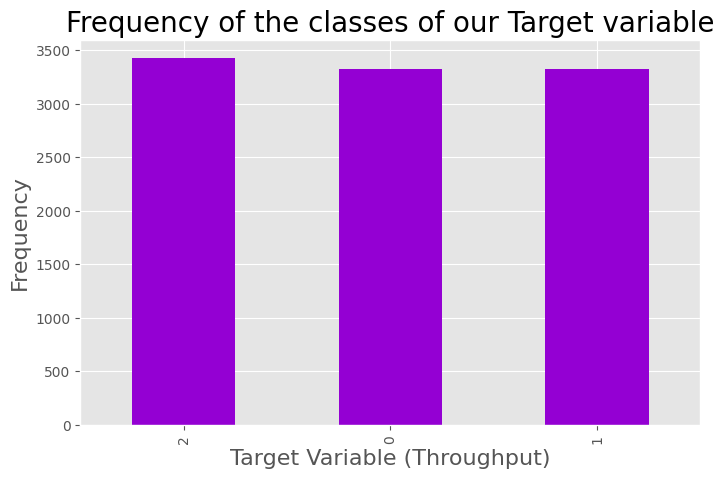

In [9]:
plt.style.use("ggplot")
df['Throughput_Mbps_'].value_counts().plot(kind="bar", 
                                  figsize = (8,5), color = "darkviolet")
plt.title("Frequency of the classes of our Target variable", size=20)
plt.xlabel("Target Variable (Throughput)", size = 16)
plt.ylabel("Frequency", size = 16)

Τη συσχέτιση μεταξύ των δεδομένων

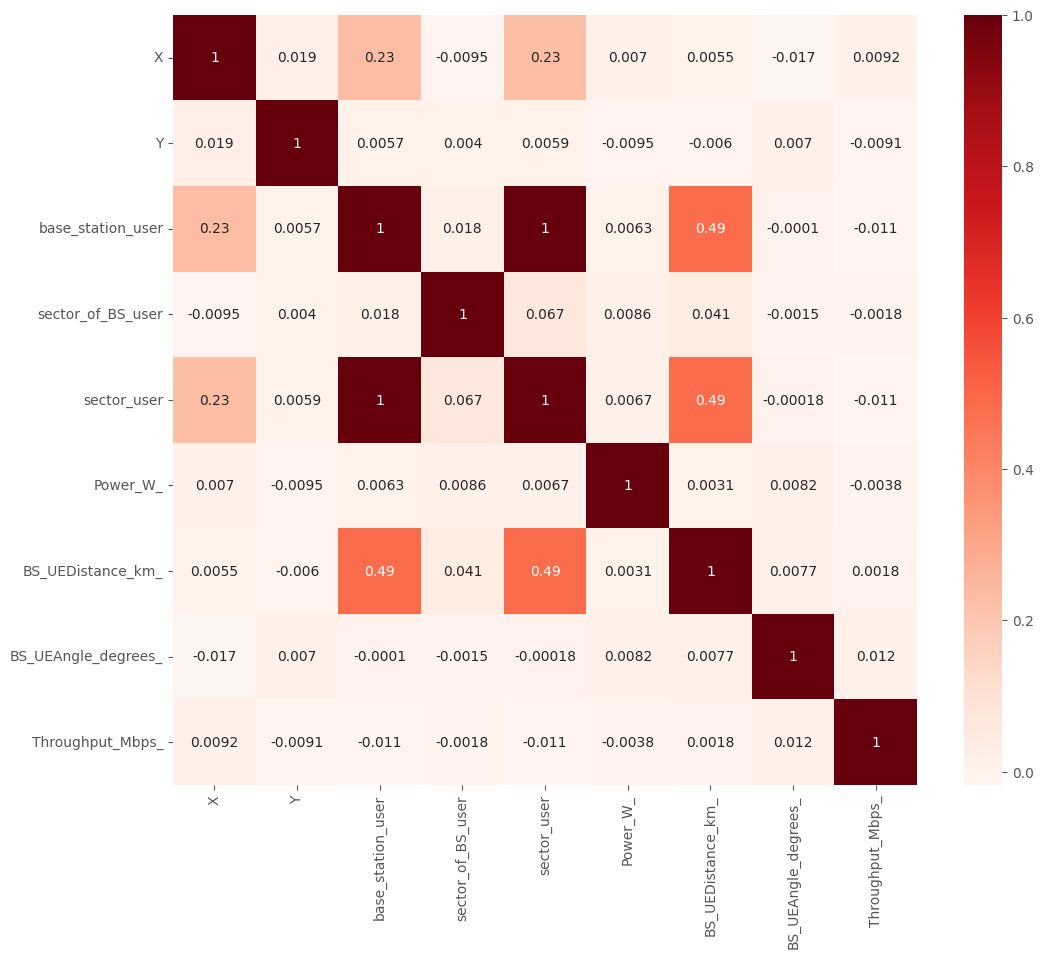

In [10]:
# Keep the non-categorical columns
df_numeric = df.select_dtypes(include=[np.number])
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
cor = df_numeric.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Βλέπουμε ότι τα χαρακτηριστικά δεν έχουν καμία συσχέτιση με την target μεταβλητή (τουλάχιστον όχι γραμμική).

Αυτό δυστυχώς σημαίνει ότι αναμένουμε χαμηλή ακρίβεια στο μοντέλο μας.

Βλέπουμε ότι οι μεταβλητές `base_station_user` and `sector_user` είναι απόλυτα συσχετισμένες μεταξύ τους, οπότε πρέπει να αφαιρεθεί μία από τις δύο.

In [11]:
# Drop the base_station_user column
df = df.drop(['base_station_user'], axis=1)

Ας προχωρήσουμε στον διαχωρισμό των μεταβλητών μας σε psuedo-categorical και numerical.
Psuedo-categorical μεταβλητές είναι αυτές που έχουν αρκετές αριθμητικές τιμές, αλλά ουσιαστικά αναπαριστούν κατηγορίες.

In [12]:
pseudo_categorical_columns = []
for column in df.columns:
    print(f"{column} : {df[column].nunique()}")
    if df[column].nunique() < 60:
        pseudo_categorical_columns.append(column)

X : 10075
Y : 10075
sector_of_BS_user : 3
sector_user : 57
ModulationType : 3
Power_W_ : 10075
BS_UEDistance_km_ : 10075
BS_UEAngle_degrees_ : 10075
Throughput_Mbps_ : 3


Ας δούμε την κατανομή των τιμών των psuedo-categorical μεταβλητών.

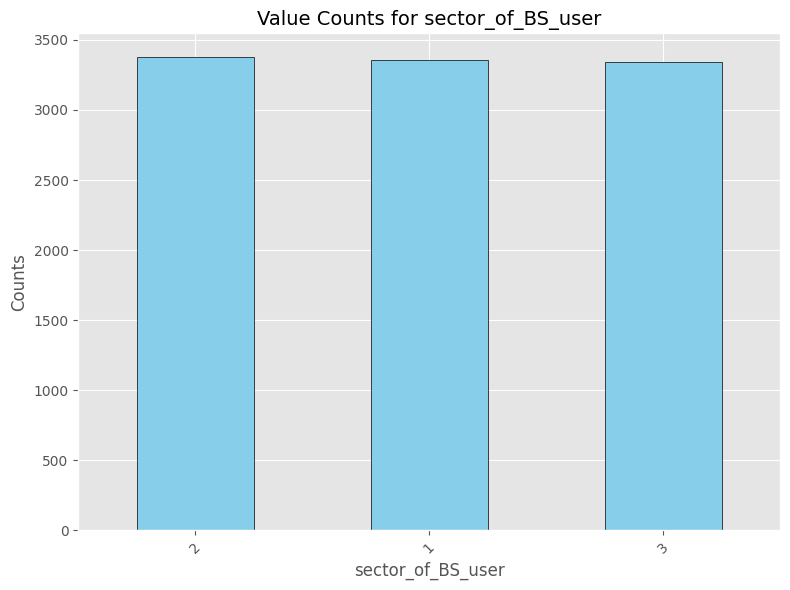

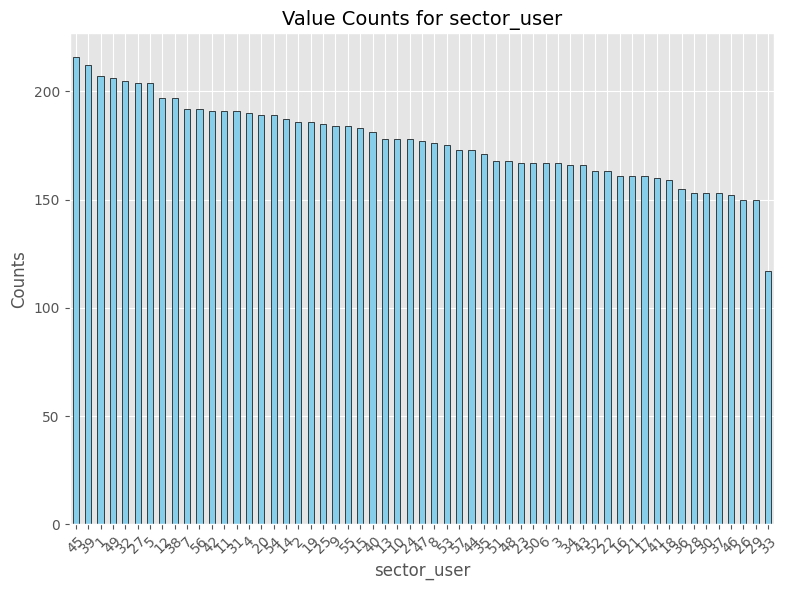

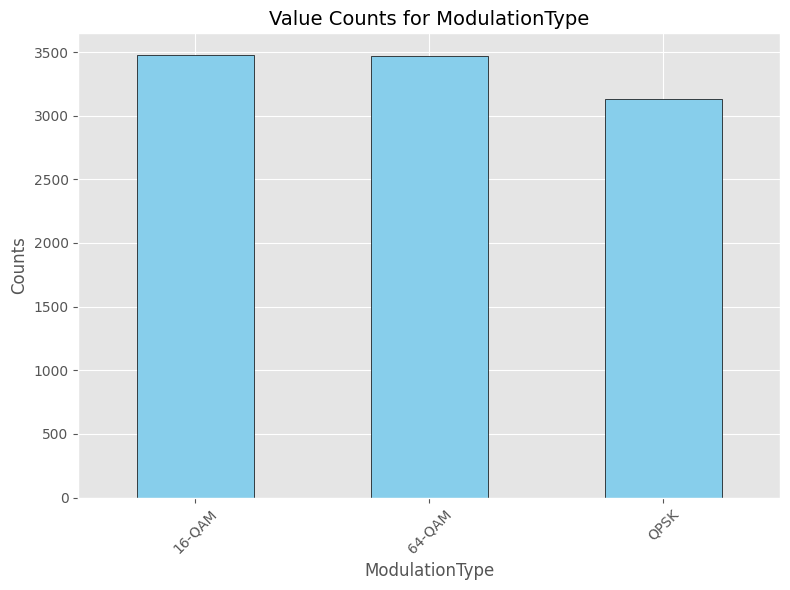

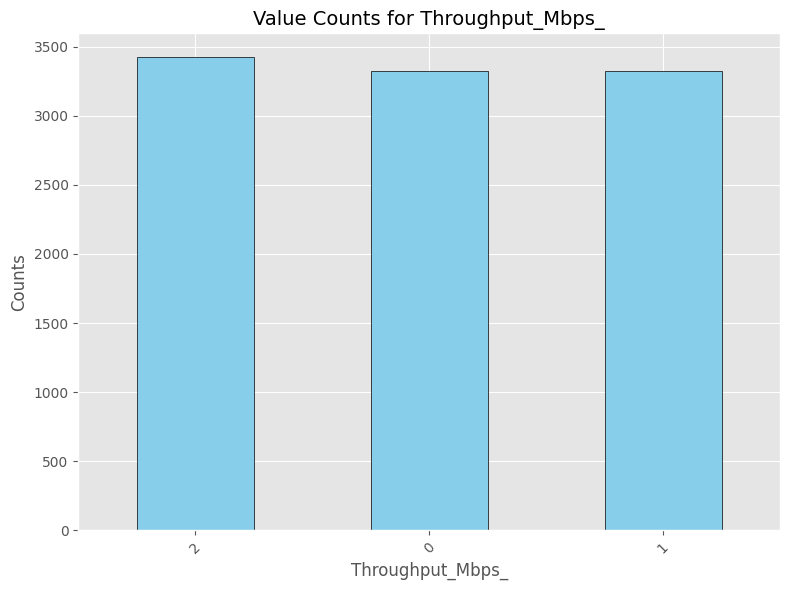

In [13]:
# Assuming df is your DataFrame
for column in pseudo_categorical_columns:
    plt.figure(figsize=(8, 6))  # Optional: Adjusts the size of each plot
    value_counts = df[column].value_counts()
    value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

    plt.title(f'Value Counts for {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Counts', fontsize=12)
    plt.xticks(rotation=45)  # Rotates x-axis labels for better readability
    plt.tight_layout()       # Adjusts subplot params so that the subplot(s) fits in to the figure area.

    plt.show()

Ας δούμε επίσης και πόσα missing values έχουμε στις μεταβλητές μας.

In [14]:
# Get the number of missing values for each column
df.isnull().sum()

X                      0
Y                      0
sector_of_BS_user      0
sector_user            0
ModulationType         0
Power_W_               0
BS_UEDistance_km_      0
BS_UEAngle_degrees_    0
Throughput_Mbps_       0
dtype: int64

Παρατηρούμε ότι δεν έχουμε missing values στις μεταβλητές μας.

Ας συνεχίσουμε με την αναλυτικότερη ανάλυση των κατανομών των αριθμητικών μεταβλητών.

In [15]:
from scipy.stats import normaltest, skew, kurtosis, probplot
from typing import List, Dict, Union

In [16]:
def test_normality(df: pd.DataFrame, 
                  alpha: float = 0.05, 
                  plot: bool = True) -> Dict[str, Dict[str, Union[float, bool]]]:
    """
    Test normality of numerical columns in a DataFrame using multiple methods.
    
    Parameters:
    -----------
    df : pandas DataFrame
        Input DataFrame containing the data
    alpha : float, optional (default=0.05)
        Significance level for statistical tests
    plot : bool, optional (default=True)
        Whether to create visualization plots
        
    Returns:
    --------
    Dict containing test results for each numerical column
    """
    # Select numerical columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) == 0:
        raise ValueError("No numerical columns found in the DataFrame")
    
    results = {}
    
    # Set up the plotting area if plotting is enabled
    if plot:
        n_cols = len(numeric_cols)
        fig_height = 4 * n_cols
        fig, axes = plt.subplots(n_cols, 3, figsize=(15, fig_height))
        if n_cols == 1:
            axes = axes.reshape(1, -1)
            
    for idx, column in enumerate(numeric_cols):
        # Get column data
        data = df[column].dropna()
        
        # Skip if too few data points
        if len(data) < 3:
            results[column] = {
                "error": "Insufficient data points for normality test"
            }
            continue
            
        k2_stat, k2_p = normaltest(data)
        
        # Calculate descriptive statistics
        skewness = skew(data)
        kurtosis_ = kurtosis(data)
        
        # Store results
        results[column] = {
            "dagostino_k2_test": {
                "statistic": k2_stat,
                "p_value": k2_p,
                "is_normal": k2_p > alpha
            },
            "descriptive_stats": {
                "skewness": skewness,
                "kurtosis": kurtosis_,
                "mean": np.mean(data),
                "median": np.median(data),
                "std": np.std(data)
            }
        }
        
        if plot:
            # Histogram with KDE
            sns.histplot(data=data, kde=True, ax=axes[idx, 0])
            axes[idx, 0].set_title(f'{column} - Distribution')
            
            # Q-Q plot
            probplot(data, dist="norm", plot=axes[idx, 1])
            axes[idx, 1].set_title(f'{column} - Q-Q Plot')
            
            # Box plot
            sns.boxplot(data=data, ax=axes[idx, 2])
            axes[idx, 2].set_title(f'{column} - Box Plot')
    
    if plot:
        plt.tight_layout()
        plt.show()
        
    return results



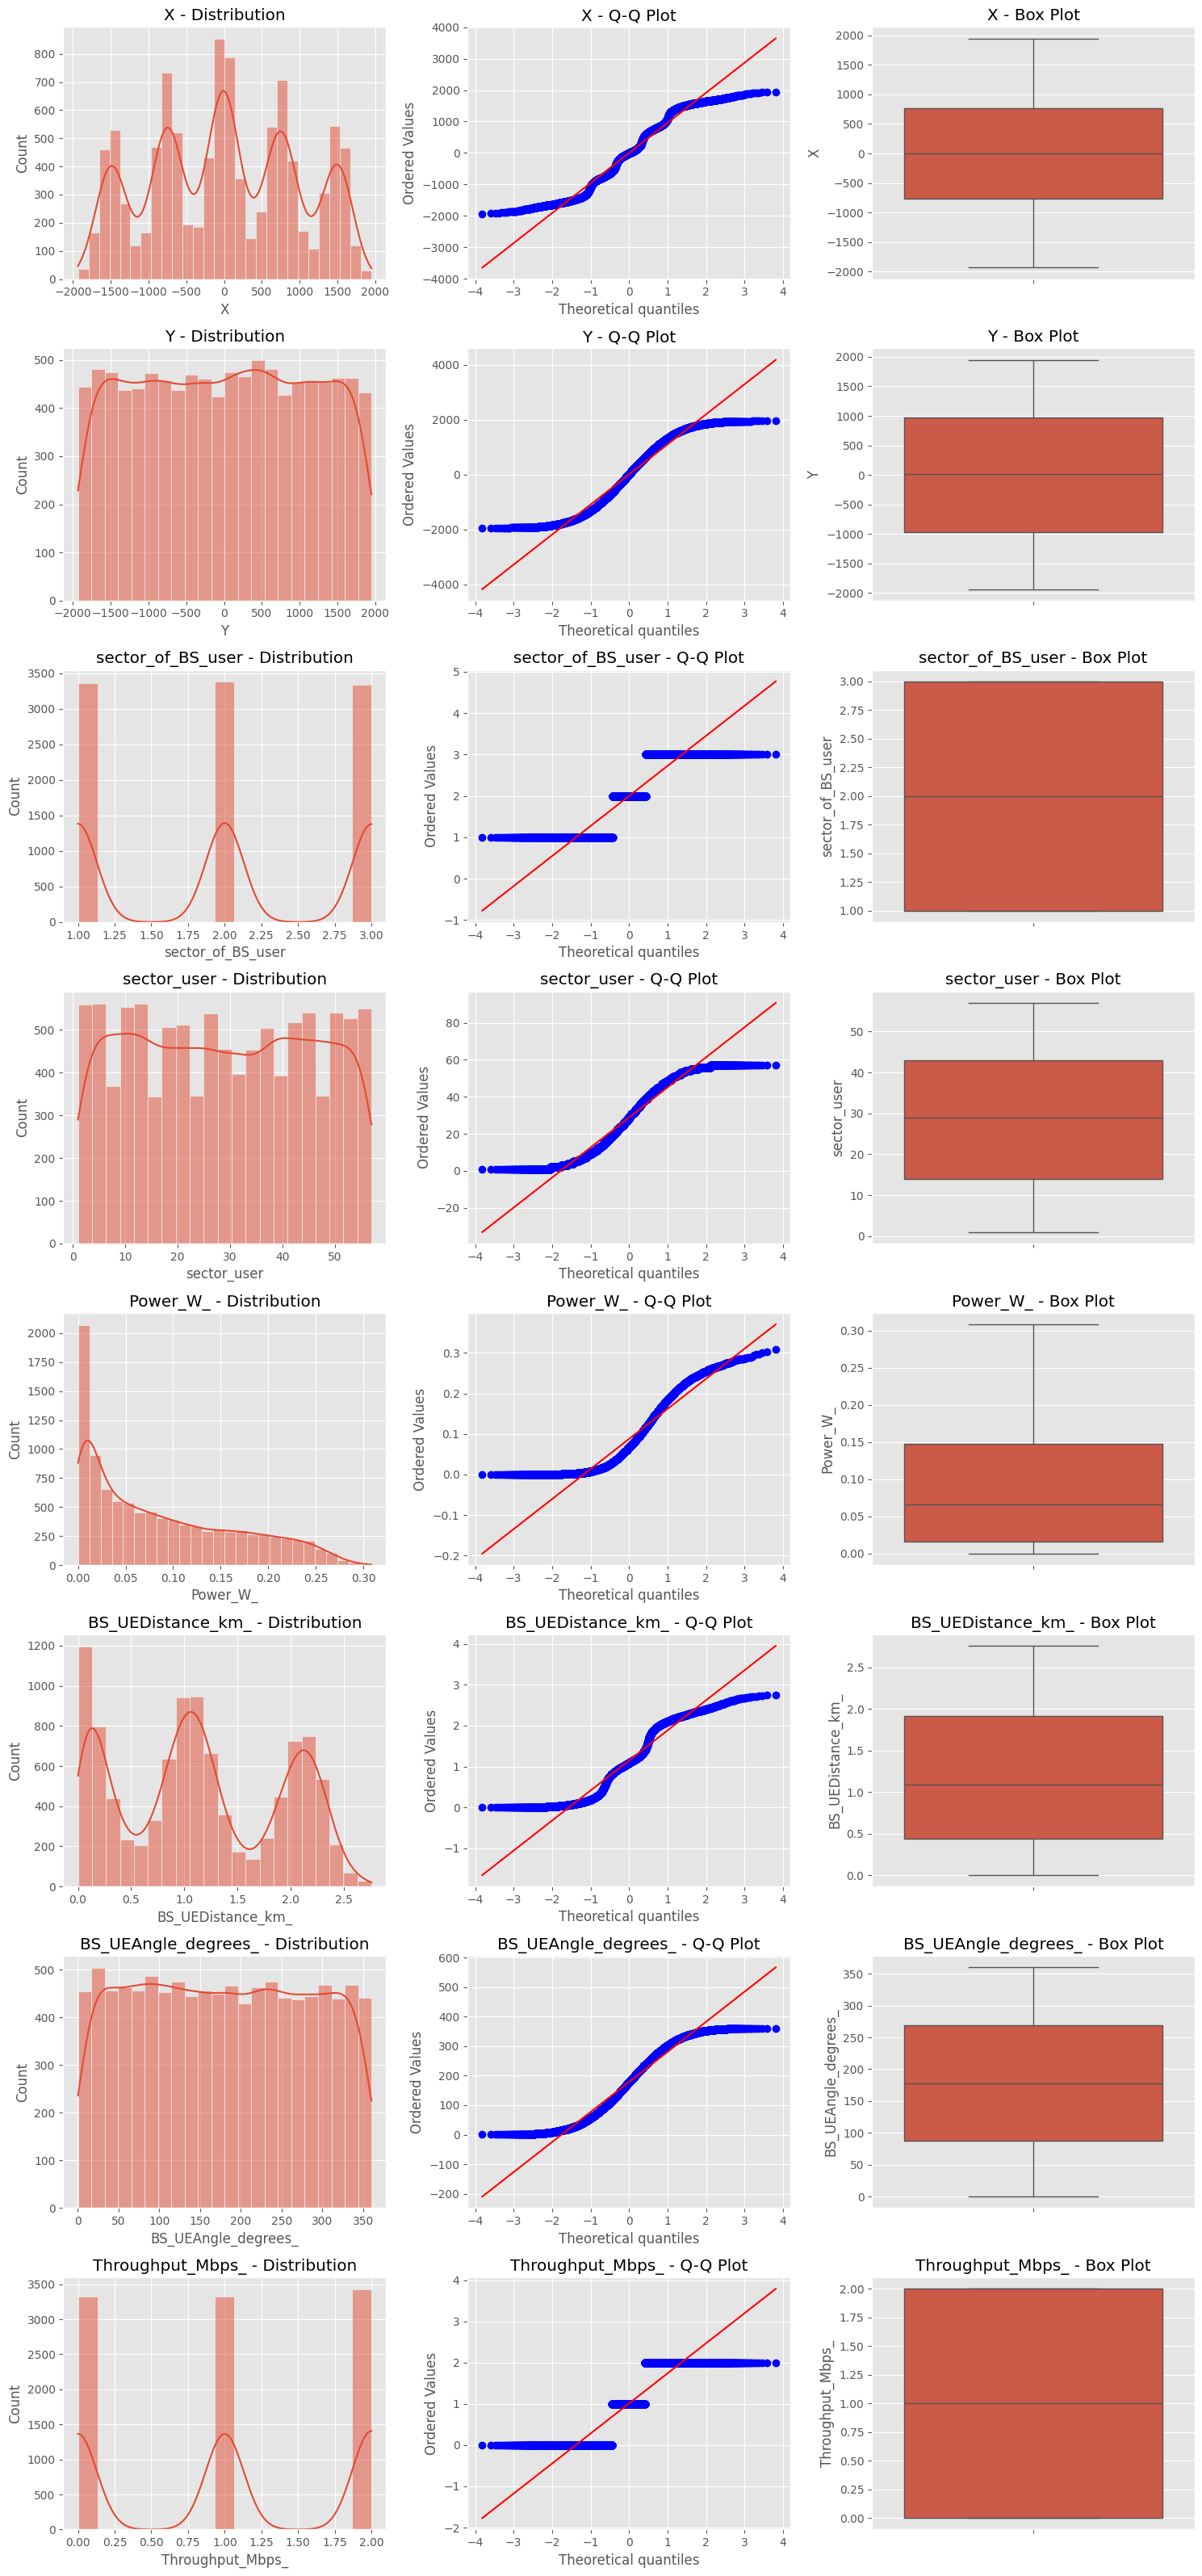


Column: X

Statistical Tests:
-----------------

D'Agostino K^2 Test:
Statistic: 2492.5094
P-value: 0.0000
Normal at α=0.05: No

Descriptive Statistics:
----------------------
Mean: -0.8735
Median: -4.3339
Standard Deviation: 973.1688
Skewness: 0.0077
Kurtosis: -1.0148

Column: Y

Statistical Tests:
-----------------

D'Agostino K^2 Test:
Statistic: 8451.0410
P-value: 0.0000
Normal at α=0.05: No

Descriptive Statistics:
----------------------
Mean: 5.1235
Median: 21.2383
Standard Deviation: 1118.0500
Skewness: -0.0056
Kurtosis: -1.1960

Column: sector_of_BS_user

Statistical Tests:
-----------------

D'Agostino K^2 Test:
Statistic: 62262.2543
P-value: 0.0000
Normal at α=0.05: No

Descriptive Statistics:
----------------------
Mean: 1.9987
Median: 2.0000
Standard Deviation: 0.8153
Skewness: 0.0024
Kurtosis: -1.4956

Column: sector_user

Statistical Tests:
-----------------

D'Agostino K^2 Test:
Statistic: 12361.0250
P-value: 0.0000
Normal at α=0.05: No

Descriptive Statistics:
--------

In [17]:
def print_normality_summary(results: Dict[str, Dict[str, Union[float, bool]]]) -> None:
    """
    Print a formatted summary of normality test results.
    
    Parameters:
    -----------
    results : Dict
        Results dictionary from test_normality function
    """
    for column, tests in results.items():
        print(f"\n{'='*50}")
        print(f"Column: {column}")
        print(f"{'='*50}")
        
        if "error" in tests:
            print(f"Error: {tests['error']}")
            continue
            
        # Print test results
        print("\nStatistical Tests:")
        print("-----------------")
        tests_info = {
            "dagostino_k2_test": "D'Agostino K^2",
        }
        
        for test_key, test_name in tests_info.items():
            test = tests[test_key]
            print(f"\n{test_name} Test:")
            print(f"Statistic: {test['statistic']:.4f}")
            print(f"P-value: {test['p_value']:.4f}")
            print(f"Normal at α=0.05: {'Yes' if test['is_normal'] else 'No'}")
        
        # Print descriptive statistics
        print("\nDescriptive Statistics:")
        print("----------------------")
        stats = tests["descriptive_stats"]
        print(f"Mean: {stats['mean']:.4f}")
        print(f"Median: {stats['median']:.4f}")
        print(f"Standard Deviation: {stats['std']:.4f}")
        print(f"Skewness: {stats['skewness']:.4f}")
        print(f"Kurtosis: {stats['kurtosis']:.4f}")

# Run tests
results = test_normality(df)

# Print summary
print_normality_summary(results)

Παρατηρούμε ότι καμία από τις αριθμητικές μεταβλητές μας δεν ακολουθεί κανονική κατανομή.

### 3. Προεπεξεργασία συνόλου δεδομένων
💡`Επεξεργαστείτε τα χαρακτηριστικά του συνόλου δεδομένων σας. Αν θεωρείτε ότι κάποια χαρακτηριστικά θα πρέπει να μετασχηματιστούν κάντε το χρησιμοποιώντας τους OneHotEncoder και LabelEncoder (αριθμητικά και κατηγορικά δεδομένα).`




In [18]:
pseudo_categorical_columns

['sector_of_BS_user', 'sector_user', 'ModulationType', 'Throughput_Mbps_']

Θα πραγματοποιήσουμε Label Encoding στις κατηγορικές μεταβλητές μας όπου έχουμε φυσική ιεραρχία μεταξύ των τιμών τους.

In [19]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Label Encode columns 'sector_of_BS_user', 'sector_user'
le = LabelEncoder()
df['sector_of_BS_user'] = le.fit_transform(df['sector_of_BS_user'])
df['sector_user'] = le.fit_transform(df['sector_user'])

Τέλος, για τη μεταβλητή `ModulationType` θα εφαρμόσουμε manual encoding για να μην χάσουμε την πληροφορία της σειράς των τιμών της.

In [20]:
# Map ModulationType where 0 = 'QPSK', 1 = '16-QAM', 2 = '64-QAM
df['ModulationType'] = df['ModulationType'].map({'QPSK': 0, '16-QAM': 1, '64-QAM': 2})

In [21]:
# OneHot encode the categorical columns
df['ModulationType'].value_counts()

ModulationType
1    3473
2    3470
0    3132
Name: count, dtype: int64

3.α.  Το σύνολο δεδομένων σας περιέχει Null values; Αν όχι αποδείξτε το με κατάλληλη εντολή. Αν ναι θα αντικαταστήσετε αυτές τις τιμές ή θα τις παραλείψετε απλώς. (Εξηγήστε)

In [22]:
# Get the number of missing values for each column
df.isnull().sum()

X                      0
Y                      0
sector_of_BS_user      0
sector_user            0
ModulationType         0
Power_W_               0
BS_UEDistance_km_      0
BS_UEAngle_degrees_    0
Throughput_Mbps_       0
dtype: int64

3.β.  Θα χρησιμοποιήσετε όλα τα χαρακτηριστικά του συνόλου δεδομένων για την εκπαίδευση των ML models ή κάνετε κάποια επιλογή;  Εξηγήστε. 


Πριν καταλήξουμε στο ποία χαρακτηριστικά θα χρησιμοποιήσουμε για την εκπαίδευση των μοντέλων μας, ας 
πραγματοποιήσουμε και ένα βασικό feature engineering.

In [23]:
df['Distance_From_Origin'] = np.sqrt(df['X']**2 + df['Y']**2)
df['Power_Distance_Ratio'] = df['Power_W_'] / (df['BS_UEDistance_km_'] + 1e-5)
df['BS_UEAngle_sin'] = np.sin(np.radians(df['BS_UEAngle_degrees_']))
df['BS_UEAngle_cos'] = np.cos(np.radians(df['BS_UEAngle_degrees_']))
df.drop('BS_UEAngle_degrees_', axis=1, inplace=True)
df['Power_Distance_Interaction'] = df['Power_W_'] * df['BS_UEDistance_km_']
df['Modulation_Power_Interaction'] = df['ModulationType'] * df['Power_W_']

We can see that `base_station_user` and `sector_user` are perfectly correlatred with each other, so we need to drop one of them.

In [24]:
# Drop base_station column if it exists
if 'base_station' in df.columns:
    df.drop('base_station', axis=1, inplace=True)

Ας συνεχίσουμε με την αφαίρεση των μεταβλητών που είναι highly correlated μεταξύ τους.

In [25]:
def remove_correlated_features(X, threshold=0.6):
    """
    Αφαιρεί τα υψηλά συσχετισμένα χαρακτηριστικά από το σύνολο δεδομένων.
    
    Parameters:
    -----------
    X : DataFrame
        DataFrame με τα αρχικά και τα μηχανικά χαρακτηριστικά
    threshold : float, default=0.6
        Όριο συσχέτισης πάνω από το οποίο αφαιρούνται τα χαρακτηριστικά
        
    Returns:
    --------
    X_filtered : DataFrame
        DataFrame με τα επιλεγμένα χαρακτηριστικά
    removed_features : dict
        Λεξικό με τα αφαιρεμένα χαρακτηριστικά και τις συσχετίσεις τους
    """
    # Υπολογισμός πίνακα συσχέτισης
    corr_matrix = X.corr().abs()
    
    # Δημιουργία άνω τριγωνικού πίνακα
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Εύρεση χαρακτηριστικών με συσχέτιση πάνω από το όριο
    removed_features = {}
    to_drop = []
    
    for column in upper.columns:            
        high_corr = upper[column][upper[column] > threshold]
        if not high_corr.empty:
            for index in high_corr.index:
                if index not in to_drop:
                    removed_features[index] = {
                        'correlated_with': column,
                        'correlation': high_corr[index]
                    }
                    to_drop.append(index)
    
    X_filtered = X.drop(columns=to_drop)
    
    return X_filtered, removed_features

# Remove correlated features
df_filtered, removed_features = remove_correlated_features(df.drop('Throughput_Mbps_', axis=1))
df_filtered['Throughput_Mbps_'] = df['Throughput_Mbps_']

<Axes: >

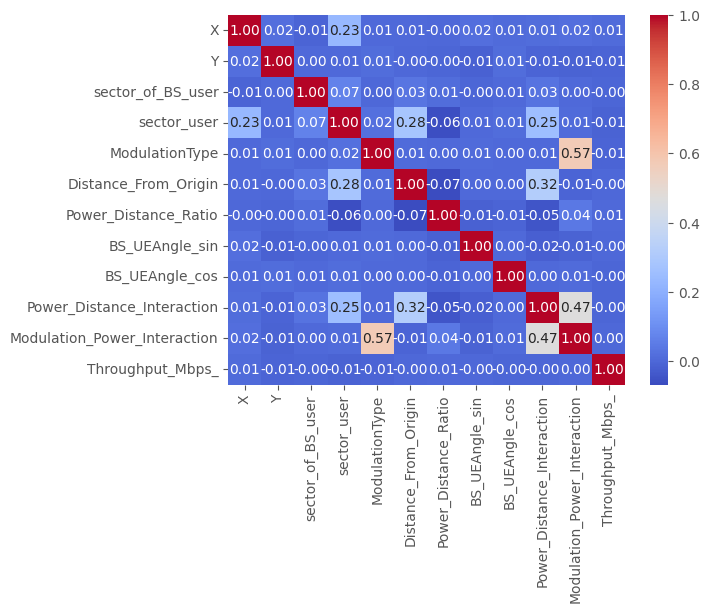

In [26]:
sns.heatmap(df_filtered.corr(), annot=True, cmap='coolwarm', fmt=".2f")

Δυστυχώς παρατηρούμε ότι ακόμη και με το feature engineering που πραγματοποιήσαμε, τα χαρακτηριστικά μας δεν έχουν καμία συσχέτιση με την target μεταβλητή.

3.γ. Υπάρχουν απουσιάζουσες τιμές; Γράψτε κατάλληλο κώδικα ώστε να χειριστείτε αυτές τις τιμές.

In [27]:
# Get the number of missing values for each column
df_filtered.isna().sum()

X                               0
Y                               0
sector_of_BS_user               0
sector_user                     0
ModulationType                  0
Distance_From_Origin            0
Power_Distance_Ratio            0
BS_UEAngle_sin                  0
BS_UEAngle_cos                  0
Power_Distance_Interaction      0
Modulation_Power_Interaction    0
Throughput_Mbps_                0
dtype: int64

Βλέπουμε ότι δεν έχουμε missing values στις μεταβλητές μας.

3.δ. Επιτελέστε κλιμάκωση των χαρακτηριστικών του συνόλου δεδομένων σας (αν την θεωρείτε απαραίτητη). Σε αυτήν την περίπτωση χρησιμοποιήστε τον MinMaxScaler

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply the MinMax Scaler to the dataset except the target variable
df_scaled = df_filtered.drop('Throughput_Mbps_', axis=1)
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)
df_scaled['Throughput_Mbps_'] = df['Throughput_Mbps_']
df_scaled.head()


,X,Y,sector_of_BS_user,sector_user,ModulationType,Distance_From_Origin,Power_Distance_Ratio,BS_UEAngle_sin,BS_UEAngle_cos,Power_Distance_Interaction,Modulation_Power_Interaction,Throughput_Mbps_
0,0.101761,0.814880,0.0,0.482143,0.0,0.752608,0.000166,0.370056,0.017181,0.558884,0.000000,0
1,0.139447,0.905973,0.0,0.428571,0.5,0.805902,0.000056,0.224799,0.917450,0.152878,0.090599,0
2,0.506960,0.126952,0.0,0.000000,0.0,0.549590,0.000013,0.387804,0.987249,0.000022,0.000000,2
3,0.116206,0.913559,0.0,0.428571,0.5,0.837477,0.000123,0.732076,0.057122,0.383250,0.213296,1
4,0.871888,0.632465,0.5,0.607143,1.0,0.588709,0.000018,0.145305,0.852408,0.053148,0.060400,2


3.ε. Αφού έχετε επεξεργαστεί (μέσω των προηγουμένων βημάτων) το σύνολο δεδομένων σας, χωρίστε το σε σύνολο εκπαίδευσης και σύνολο επαλήθευσης. Ξεκινήστε με μια αναλογία 80%-20%. Πειραματιστείτε με διαφορετικές τιμές αν το κρίνετε απαραίτητο για την βελτίωση των δεικτών απόδοσης.

💡 `Η στήλη 'Troughput' είναι αυτή που θα πρέπει να χρησιμοποιηθεί ως μεταβλητή απόκρισης στο Classification πρόβλημα που καλείστε να επιλύσετε.` 

In [29]:
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = df_scaled.drop('Throughput_Mbps_', axis=1)
y = df_scaled['Throughput_Mbps_']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3.στ. Χρησιμοποιήστε την τεχνική Chi-Squared Feature Selection για να μελετήσετε την σημαντικότητα του εκάστοτε χαρακτηριστικού

Θα επιλέξουμε τα 6 πιο σημαντικά χαρακτηριστικά μας.

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=4)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# Keep the 6 best features
X_train_fs.shape, X_test_fs.shape


((8060, 4), (2015, 4))

3.ζ. Δημιουργήστε κατάλληλο διάγραμμα ώστε να αποτυπώσετε την μελετούμενη σημαντικότητα

Feature X: 0.412697
Feature Y: 0.671603
Feature sector_of_BS_user: 0.179035
Feature sector_user: 0.416746
Feature ModulationType: 0.263483
Feature Distance_From_Origin: 0.000035
Feature Power_Distance_Ratio: 0.129563
Feature BS_UEAngle_sin: 0.305042
Feature BS_UEAngle_cos: 1.590981
Feature Power_Distance_Interaction: 1.124382
Feature Modulation_Power_Interaction: 0.633068


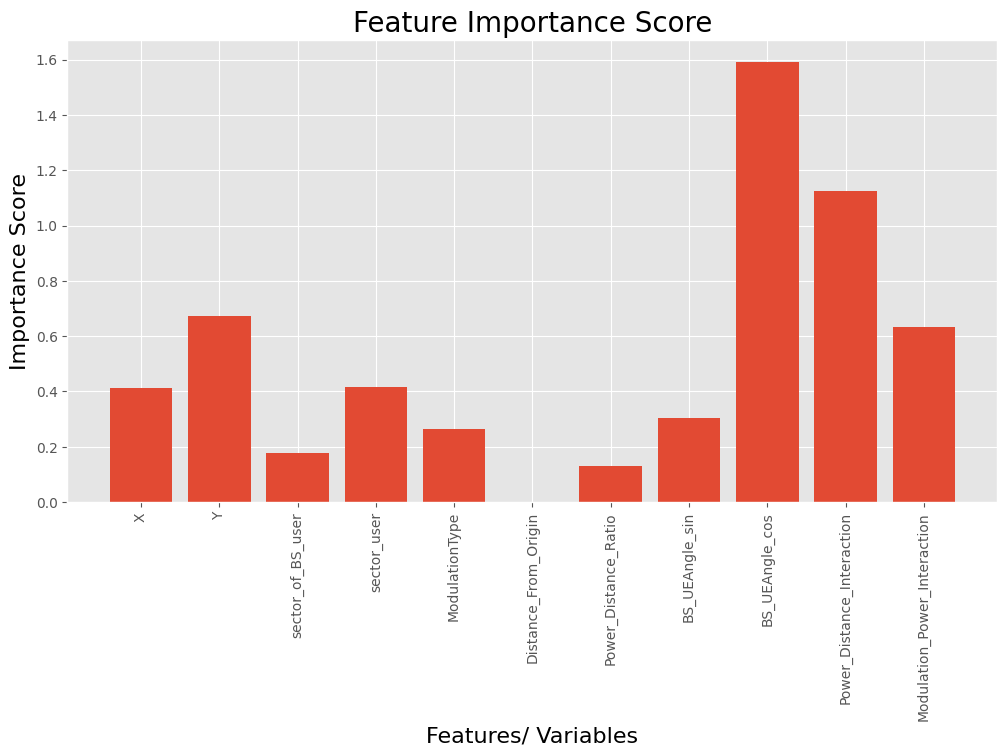

In [31]:
# Assuming your features are in a DataFrame called X
feature_names = X.columns  # or feature_names = your_dataframe.columns

# Print feature names with their scores
for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (feature_names[i], fs.scores_[i]))
# plot the scores
plt.figure(figsize = (12,6))
plt.bar(feature_names, fs.scores_)
plt.title("Feature Importance Score", size = 20)
plt.xlabel("Features/ Variables", size = 16, color = "black")
# Rotate x-labels
plt.xticks(rotation = 90)
plt.ylabel("Importance Score", size = 16, color = "black")
plt.show()

### 4. Εκπαίδευση ML μοντέλων για την αντιμετώπιση του Throughput prediction ως πρόβλημα παλινδρόμισης

Θα εκπαιδεύσετε τους ML αλγορίθμους που σας έχουν γνωστοποιηθεί μέσω προσωπικού μηνύματος ξεκινώντας με default τιμές στις παραμέτρους αυτών


4.α. Φορτώστε τις κατάλληλες βιβλιοθήκες

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Classification: kNN, Linear SVM, Logistic Regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

svm = SVC()
knn = KNeighborsClassifier()
log_reg = LogisticRegression()


4.β. Εκπαιδεύστε (fit) τους ML αλγορίθμους σας χρησιμοποιώντας τις default τιμές για όλες τις παραμέτρους τους.

In [33]:
# Fit the models
svm.fit(X_train_fs, y_train)
knn.fit(X_train_fs, y_train)
log_reg.fit(X_train_fs, y_train)

LogisticRegression()

4.γ. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το test set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [34]:
# Predict the target variable
y_pred_svm = svm.predict(X_test_fs)
y_pred_knn = knn.predict(X_test_fs)
y_pred_log_reg = log_reg.predict(X_test_fs)

In [35]:
preds = [y_pred_svm, y_pred_knn, y_pred_log_reg]

4.δ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του test set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας τις ML μετρικές (ML KPIs) που αναφέρονται στην εκφώνηση της 2ης εργαστηριακής άσκησης (θα χρειαστεί import των αντίστοιχων μετρικών από το sklearn).

In [36]:
for pred in preds:
    print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.32      0.24      0.27       657
           1       0.32      0.37      0.34       673
           2       0.33      0.36      0.34       685

    accuracy                           0.32      2015
   macro avg       0.32      0.32      0.32      2015
weighted avg       0.32      0.32      0.32      2015

              precision    recall  f1-score   support

           0       0.34      0.47      0.40       657
           1       0.36      0.37      0.36       673
           2       0.33      0.20      0.25       685

    accuracy                           0.35      2015
   macro avg       0.34      0.35      0.34      2015
weighted avg       0.34      0.35      0.34      2015

              precision    recall  f1-score   support

           0       0.32      0.21      0.25       657
           1       0.33      0.34      0.34       673
           2       0.34      0.44      0.39       685

    accuracy        

4.στ. Απεικονίστε την παραπάνω αξιολόγηση με χρήση γραφήματος/γραφημάτων (π.χ. ιστόγραμμα, bar plot κατά προτίμιση της Matplotlib)

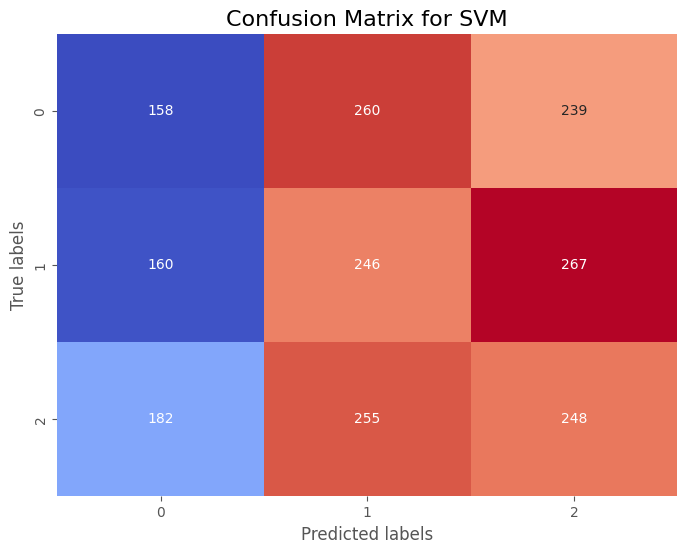

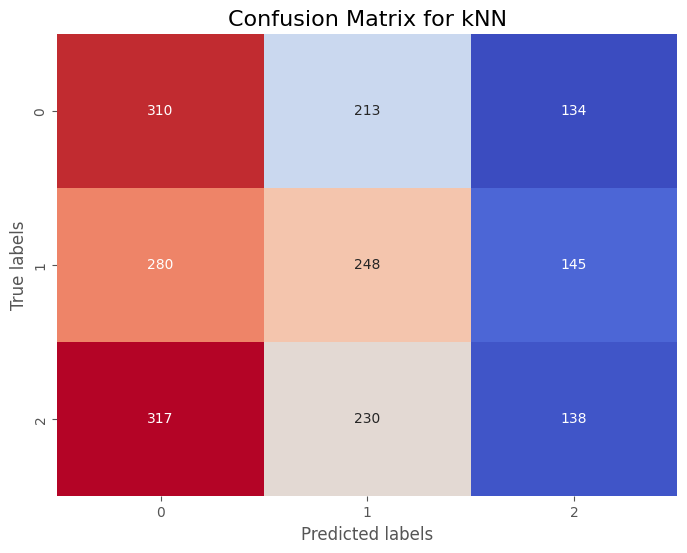

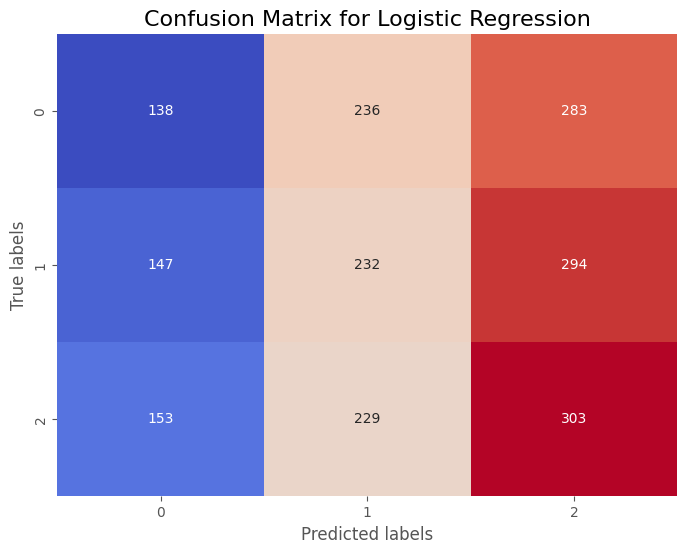

In [37]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {model_name}', size=16)
    plt.show()
    
plot_confusion_matrix(y_test, y_pred_svm, 'SVM')
plot_confusion_matrix(y_test, y_pred_knn, 'kNN')
plot_confusion_matrix(y_test, y_pred_log_reg, 'Logistic Regression')

4.ζ Σχολιάστε στην αναφορά σας το ποιο μοντέλο είχε την καλύτερη επίδοση. Ήταν αυτό αναμενόμενο με βάση τη θεωρία του 3.2 κεφαλαίου των σημειώσεών σας;

## Ανάλυση Πινάκων Σύγχυσης και Σύγκριση Μοντέλων

Για να σχολιάσουμε ποιο μοντέλο είχε την καλύτερη επίδοση στις ταξινομήσεις και εάν αυτό ήταν αναμενόμενο με βάση τη θεωρία του κεφαλαίου 3.2, θα εξετάσουμε τις παρακάτω παραμέτρους με βάση τους νέους πίνακες σύγχυσης.

## 1. Ποσοτική Ανάλυση του Πίνακα Σύγχυσης
- Ο πίνακας σύγχυσης παρέχει πληροφορίες για τις σωστές προβλέψεις (διαγώνιος) και τις λανθασμένες προβλέψεις (εκτός διαγωνίου).
- Κάθε μοντέλο μπορεί να αξιολογηθεί βάσει της ακρίβειας (accuracy), της ευαισθησίας (recall), της ακρίβειας ανά κλάση (precision per class), ή άλλων δεικτών όπως το F1-score.

## 2. Σχόλια για το Καλύτερο Μοντέλο
- **SVM**: 
  - Η απόδοσή της παραμένει σχετικά καλή, αλλά με αυξημένες λανθασμένες προβλέψεις στις τάξεις, ιδιαίτερα στην Κλάση 2.
  - Οι σωστές προβλέψεις βρίσκονται στις τιμές: `158`, `246`, και `248`.
- **kNN**: 
  - Βελτιώνει την ακρίβεια στις Κλάσεις 0 και 1 σε σχέση με την προηγούμενη μέτρηση, με τις σωστές προβλέψεις να είναι: `310`, `248`, και `138`.
  - Παρόλα αυτά, η Κλάση 2 παραμένει πιο προβληματική με υψηλότερη διάσπαρση λανθασμένων προβλέψεων.
- **Λογιστική Παλινδρόμηση**:
  - Εμφανίζει υψηλή λανθασμένη πρόβλεψη σε όλες τις τάξεις, με σωστές προβλέψεις: `138`, `232`, και `303`.
  - Φαίνεται να μην αποδίδει ικανοποιητικά σε αυτό το πρόβλημα ταξινόμησης.

## 3. Θεωρητική Αντιστοιχία με το Κεφάλαιο 3.2
- Η **SVM** εξακολουθεί να θεωρείται κατάλληλη για προβλήματα με γραμμικό ή ημιγραμμικό διαχωρισμό, αλλά τα νέα δεδομένα δείχνουν πιθανές δυσκολίες στον χειρισμό πιο σύνθετων μοτίβων.
- Το **kNN** επηρεάζεται από την επιλογή του αριθμού γειτόνων και είναι πιο ευαίσθητο σε μη γραμμικά όρια απόφασης.
- Η **Λογιστική Παλινδρόμηση**, παρότι απλή, δεν φαίνεται να διαχειρίζεται καλά τη σύνθετη δομή δεδομένων του προβλήματος.

## 4. Συμπεράσματα
- Από την ανάλυση των νέων πινάκων σύγχυσης, το μοντέλο **kNN** φαίνεται να αποδίδει καλύτερα στις Κλάσεις 0 και 1, αλλά παραμένει προβληματικό για την Κλάση 2.
- Η **SVM**, παρά τις δυσκολίες, διατηρεί μια ισορροπία απόδοσης.
- Η **Λογιστική Παλινδρόμηση** υπολείπεται σημαντικά και δεν φαίνεται κατάλληλη για αυτό το πρόβλημα.


4.η Κάνοντας δοκιμές στις υπερπαραμέτρους των ML αλγορίθμων που υλοποιήσατε, προσπαθήστε να βελτιώσετε την επίδοσή τους με βάση τις μετρικές τις οποίες έχετε επιλέξει

Θα πραγματοποιήσουμε hyperparameter tuning με τη χρήση του Optuna.

In [53]:
import optuna
from optuna.exceptions import TrialPruned
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

classifiers = {
    "SVC": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(
        random_state=42, max_iter=1000, multi_class="multinomial"
    ),
}


def define_model_params(trial, classifier_name):
    """
    Define hyperparameter search spaces for specified classifiers using Optuna.

    Parameters:
    -----------
    trial : optuna.Trial
        The Optuna trial object for parameter optimization
    classifier_name : str
        Name of the classifier to configure

    Returns:
    --------
    dict
        Dictionary of hyperparameters for the specified classifier
    """
    params = {}

    if classifier_name == "SVC":
        # Exclude 'sigmoid' kernel to prevent potential numerical issues
        kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly'])
        params['kernel'] = kernel

        # Adjusted 'C' range to prevent extreme values
        params['C'] = trial.suggest_float('C', 1e-2, 1e2, log=True)

        # Conditionally suggest 'gamma' based on kernel
        if kernel in ['rbf', 'poly']:
            params['gamma'] = trial.suggest_float('gamma', 1e-3, 1e1, log=True)
        else:
            params['gamma'] = 'scale'  # Default value when 'gamma' is not used

        # Conditionally suggest 'degree' only if kernel is 'poly'
        if kernel == 'poly':
            params['degree'] = trial.suggest_int('degree', 2, 5)
        else:
            params['degree'] = 3  # Default degree

        # Suggest 'class_weight' to handle class imbalance
        params['class_weight'] = trial.suggest_categorical('class_weight', [None, 'balanced'])

    elif classifier_name == "KNN":
        params = {
            'n_neighbors': trial.suggest_int('n_neighbors', 1, 50),
            'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
            'metric': trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski', 'chebyshev']),
            'p': trial.suggest_int('p', 1, 5)  # Relevant if metric is 'minkowski'
        }

    elif classifier_name == "LogisticRegression":
        # First, suggest 'penalty'
        penalty = trial.suggest_categorical('penalty', ['l1', 'l2', None])
        params['penalty'] = penalty

        if penalty == 'l1':
            # 'l1' is supported by 'liblinear' and 'saga'
            solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])
        elif penalty == 'l2':
            # 'l2' is supported by 'liblinear', 'lbfgs', and 'saga'
            solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs', 'saga'])
        elif penalty is None:
            # Default solver
            solver = 'lbfgs'
    
        params['solver'] = solver

        # If penalty is 'elasticnet', suggest 'l1_ratio'
        if penalty == 'elasticnet':
            params['l1_ratio'] = trial.suggest_float('l1_ratio', 0.0, 1.0)
        else:
            params['l1_ratio'] = None  # Not used

        # Suggest 'C' if penalty is not 'none'
        if penalty != 'none':
            params['C'] = trial.suggest_float('C', 1e-4, 1e4, log=True)
        else:
            params['C'] = 1.0  # Default value; not used when penalty='none'

    return params


In [49]:
def create_objective(X, y, classifier_name, n_splits=5):
    """
    Creates an objective function for Optuna optimization using stratified cross-validation
    and F1 score as the evaluation metric.

    Parameters:
    -----------
    X : array-like or DataFrame
        Feature matrix for training
    y : array-like or Series
        Target variable
    classifier_name : str
        Name of the classifier to optimize
    n_splits : int, default=5
        Number of stratified folds for cross-validation

    Returns:
    --------
    objective : function
        Objective function for Optuna to optimize
    """

    def objective(trial):
        try:
            # Define hyperparameters for the current trial
            params = define_model_params(trial, classifier_name)

            # Remove parameters that are set to None
            clf_params = {k: v for k, v in params.items() if v is not None}

            # Initialize the classifier with the suggested hyperparameters
            clf = classifiers[classifier_name].__class__(**clf_params)

            # Create stratified k-fold cross-validator
            cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

            # Perform cross-validation using 'f1_macro' as the scoring metric
            scores = cross_val_score(
                clf,
                X,
                y,
                cv=cv,
                scoring='f1_macro',
                n_jobs=8
            )

            # Check for NaN scores
            if np.isnan(scores).any():
                raise ValueError(f"NaN score encountered with parameters: {params}")

            # Calculate mean F1 score
            mean_f1 = np.mean(scores)

            # Optional: Store the score variance for monitoring
            trial.set_user_attr('score_variance', np.var(scores))

            return mean_f1

        except ValueError as ve:
            # Handle specific ValueError exceptions
            trial.set_user_attr('error', str(ve))
            raise TrialPruned(f"Trial failed due to ValueError: {str(ve)}")
        except Exception as e:
            # Handle all other exceptions
            trial.set_user_attr('error', str(e))
            raise TrialPruned(f"Trial failed due to Exception: {str(e)}")

    return objective


In [50]:
def optimize_model(X, y, classifier_name, n_trials=100):
    """
    Runs the optimization process for a given classifier using F1 score as the metric.

    Parameters:
    -----------
    X : array-like or DataFrame
        Feature matrix
    y : array-like or Series
        Target variable
    classifier_name : str
        Name of the classifier to optimize
    n_trials : int, default=100
        Number of optimization trials to run

    Returns:
    --------
    study : optuna.Study
        Completed optimization study
    """
    # Create a study with a pruner
    pruner = optuna.pruners.MedianPruner()

    study = optuna.create_study(
        direction="maximize",
        pruner=pruner,
        study_name=f"{classifier_name}_optimization"
    )

    # Create the objective function with F1 scoring
    objective = create_objective(X, y, classifier_name)

    # Optimize the study
    study.optimize(objective, n_trials=n_trials, n_jobs=-1)

    return study


In [51]:
import numpy as np
import pandas as pd

# Assuming X_train and y_train are pandas DataFrame/Series
print("Checking for NaN values in X_train:")
print(X_train.isnull().sum().sum())

print("\nChecking for NaN values in y_train:")
print(y_train.isnull().sum())

print("\nChecking for infinite values in X_train:")
print(np.isinf(X_train).sum().sum())

print("\nChecking for infinite values in y_train:")
print(np.isinf(y_train).sum())


Checking for NaN values in X_train:
0

Checking for NaN values in y_train:
0

Checking for infinite values in X_train:
0

Checking for infinite values in y_train:
0


In [52]:
# Dictionary to store the studies
studies = {}
best_classifiers = {}

# Run optimization for each classifier
for classifier_name in classifiers.keys():
    print(f"\nOptimizing {classifier_name}...")
    study = optimize_model(X_train, y_train, classifier_name, n_trials=50)  # Adjust n_trials as needed
    studies[classifier_name] = study
    
    # Retrieve the best trial
    best_trial = study.best_trial
    
    print(f"Best F1 Score for {classifier_name}: {best_trial.value:.4f}")
    print("Best hyperparameters:")
    for key, value in best_trial.params.items():
        print(f"  {key}: {value}")
    
    # Initialize the classifier with the best hyperparameters
    best_params = {k: v for k, v in best_trial.params.items() if v is not None}
    best_clf = classifiers[classifier_name].__class__(**best_params)
    
    # Fit the best classifier on the entire training data
    best_clf.fit(X_train, y_train)
    
    # Store the best classifier
    best_classifiers[classifier_name] = best_clf


[I 2025-01-04 14:58:28,331] A new study created in memory with name: SVC_optimization



Optimizing SVC...


[I 2025-01-04 14:58:31,487] Trial 1 finished with value: 0.3149508027309459 and parameters: {'kernel': 'rbf', 'C': 1.920803277718488, 'gamma': 0.9820250146691102, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.3149508027309459.
[I 2025-01-04 14:58:33,287] Trial 8 finished with value: 0.3249607148015432 and parameters: {'kernel': 'linear', 'C': 1.104564604448335, 'class_weight': 'balanced'}. Best is trial 8 with value: 0.3249607148015432.
[I 2025-01-04 14:58:33,289] Trial 0 finished with value: 0.3213737378373746 and parameters: {'kernel': 'rbf', 'C': 1.4156416041936408, 'gamma': 1.3535337077099743, 'class_weight': 'balanced'}. Best is trial 8 with value: 0.3249607148015432.
[I 2025-01-04 14:58:35,607] Trial 7 finished with value: 0.1709704476694321 and parameters: {'kernel': 'poly', 'C': 0.04628783232061344, 'gamma': 0.2287963454270713, 'degree': 4, 'class_weight': None}. Best is trial 8 with value: 0.3249607148015432.
[I 2025-01-04 14:58:36,751] Trial 4 finished with value

Best F1 Score for SVC: 0.3303
Best hyperparameters:
  kernel: linear
  C: 0.03727419267347051
  class_weight: balanced


[I 2025-01-04 14:59:02,231] A new study created in memory with name: KNN_optimization



Optimizing KNN...


[I 2025-01-04 14:59:02,418] Trial 1 finished with value: 0.3185655802091507 and parameters: {'n_neighbors': 4, 'weights': 'uniform', 'metric': 'chebyshev', 'p': 5}. Best is trial 1 with value: 0.3185655802091507.
[I 2025-01-04 14:59:02,442] Trial 3 finished with value: 0.32465101875917235 and parameters: {'n_neighbors': 5, 'weights': 'uniform', 'metric': 'minkowski', 'p': 1}. Best is trial 3 with value: 0.32465101875917235.
[I 2025-01-04 14:59:02,716] Trial 10 finished with value: 0.32234995888039364 and parameters: {'n_neighbors': 11, 'weights': 'distance', 'metric': 'chebyshev', 'p': 1}. Best is trial 3 with value: 0.32465101875917235.
[I 2025-01-04 14:59:02,765] Trial 2 finished with value: 0.32752081156511215 and parameters: {'n_neighbors': 30, 'weights': 'distance', 'metric': 'manhattan', 'p': 2}. Best is trial 2 with value: 0.32752081156511215.
[I 2025-01-04 14:59:02,836] Trial 11 finished with value: 0.3190703098722302 and parameters: {'n_neighbors': 18, 'weights': 'uniform', 'm

Best F1 Score for KNN: 0.3339
Best hyperparameters:
  n_neighbors: 13
  weights: uniform
  metric: manhattan
  p: 1

Optimizing LogisticRegression...


[I 2025-01-04 14:59:05,944] Trial 7 finished with value: 0.3281058930192139 and parameters: {'penalty': 'l2', 'solver': 'lbfgs', 'C': 0.0742557319665928}. Best is trial 1 with value: 0.32879604502615867.
[I 2025-01-04 14:59:05,948] Trial 5 finished with value: 0.16918184882398984 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.0004769068126464922}. Best is trial 1 with value: 0.32879604502615867.
[I 2025-01-04 14:59:05,986] Trial 6 finished with value: 0.3278679177464656 and parameters: {'penalty': 'l2', 'solver': 'lbfgs', 'C': 1010.5722511353734}. Best is trial 1 with value: 0.32879604502615867.
[I 2025-01-04 14:59:06,088] Trial 23 finished with value: 0.16918184882398984 and parameters: {'penalty': 'elasticnet', 'l1_ratio': 0.4362978223953712, 'C': 0.003783628050162506}. Best is trial 1 with value: 0.32879604502615867.
[I 2025-01-04 14:59:06,277] Trial 12 finished with value: 0.3279888446170174 and parameters: {'penalty': 'elasticnet', 'l1_ratio': 0.2822979598871398, 'C': 

Best F1 Score for LogisticRegression: 0.3292
Best hyperparameters:
  penalty: elasticnet
  l1_ratio: 0.156723541461666
  C: 2.8459580661084494


ValueError: Solver lbfgs supports only 'l2' or None penalties, got elasticnet penalty.

### Bonus Ερώτημα

Για μια πιο αποτελεσματική εύρεση των υπερπαραμέτρων που βελτιστοποιούν την απόδοση των ML αλγορίθμων, γίνεται χρήση κάποιας συστηματικής αναζήτησης. Δοκιμάστε αναζήτηση πλέγματος με διασταυρούμενη επικύρωση (k-fold 10) (Πληροφορίες [εδώ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)) ή/και HalvingGridSearch (Πληροφορίες [εδώ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html)) με σκοπό την εύρεση των βέλτιστων υπερπαραμέτρων. 

In [38]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Ορισμός των αλγορίθμων
classifiers = {
    "SVC": SVC(random_state=42),  # 'ovr' για πολυκλάση
    "KNN": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(
        random_state=42,
        max_iter=1000,
        multi_class='multinomial'  # Κατάλληλο για πολυκλάση
    )
}

In [39]:
# Ορισμός πλέγματος υπερπαραμέτρων για κάθε αλγόριθμο
param_grid = {
    "SVC": {
        'kernel': ['linear', 'rbf', 'poly'],
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 0.001, 0.01, 0.1, 1],
        'class_weight': [None, 'balanced']
    },
    "KNN": {
        'n_neighbors': list(range(1, 51)),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
        'p': [1, 2, 3, 4, 5]
    },
    "LogisticRegression": [
        {
            'penalty': ['l1'],
            'solver': ['saga'],
            'C': [0.1, 1, 10, 100],
            'l1_ratio': [0.0, 0.25, 0.5, 0.75, 1.0]
        },
        {
            'penalty': ['l2'],
            'solver': ['lbfgs', 'sag', 'saga', 'newton-cg'],
            'C': [0.1, 1, 10, 100]
        },
        {
            'penalty': ['elasticnet'],
            'solver': ['saga'],
            'C': [0.1, 1, 10, 100],
            'l1_ratio': [0.0, 0.25, 0.5, 0.75, 1.0]
        },
        {
            'penalty': [None],
            'solver': ['lbfgs', 'sag', 'saga', 'newton-cg'],
            'C': [0.1, 1, 10, 100]  # Παρόλο που 'C' δεν χρησιμοποιείται με penalty='none', το περιλαμβάνουμε για συνέπεια
        }
    ]
}


In [40]:
# Ορισμός της διασταυρούμενης επικύρωσης
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Λήψη του F1 Macro ως μέτρο απόδοσης
scoring = 'f1_macro'


In [41]:
# Δημιουργία λεξικού για αποθήκευση των καλύτερων μοντέλων
best_classifiers = {}

# Εκτέλεση GridSearchCV για κάθε αλγόριθμο
for classifier_name in classifiers.keys():
    print(f"\nΒελτιστοποίηση {classifier_name}...")
    
    # Ανάκτηση του πλέγματος υπερπαραμέτρων για τον τρέχοντα αλγόριθμο
    current_param_grid = param_grid[classifier_name]
    
    # Δημιουργία του GridSearchCV αντικειμένου
    grid_search = GridSearchCV(
        estimator=classifiers[classifier_name],
        param_grid=current_param_grid,
        scoring=scoring,
        cv=cv,
        n_jobs=8,
        verbose=1  # Για παρακολούθηση της προόδου
    )
    
    # Εκτέλεση της αναζήτησης
    grid_search.fit(X, y)
    
    # Εκτύπωση των καλύτερων παραμέτρων και του αντίστοιχου σκορ
    print(f"Καλύτερο F1 Macro για {classifier_name}: {grid_search.best_score_:.4f}")
    print("Καλύτερες υπερπαραμέτρους:")
    for param_name in grid_search.best_params_:
        print(f"  {param_name}: {grid_search.best_params_[param_name]}")
    
    # Αποθήκευση του καλύτερου μοντέλου
    best_classifiers[classifier_name] = grid_search.best_estimator_



Βελτιστοποίηση SVC...
Fitting 10 folds for each of 120 candidates, totalling 1200 fits
Καλύτερο F1 Macro για SVC: 0.3321
Καλύτερες υπερπαραμέτρους:
  C: 10
  class_weight: balanced
  gamma: scale
  kernel: poly

Βελτιστοποίηση KNN...
Fitting 10 folds for each of 2000 candidates, totalling 20000 fits
Καλύτερο F1 Macro για KNN: 0.3352
Καλύτερες υπερπαραμέτρους:
  metric: manhattan
  n_neighbors: 14
  p: 1
  weights: uniform

Βελτιστοποίηση LogisticRegression...
Fitting 10 folds for each of 72 candidates, totalling 720 fits
Καλύτερο F1 Macro για LogisticRegression: 0.3201
Καλύτερες υπερπαραμέτρους:
  C: 100
  penalty: l2
  solver: sag


c:\Users\panagiotis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
160 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\panagiotis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\panagiotis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\panagiotis\AppData\Local\Programs\Python\Python311\Lib\site-p

Εφαρμόστε στα εκπαιδευμένα μοντέλα από το test set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).

In [42]:
for cls in best_classifiers.keys():
    print(f"\nΑπόδοση του {cls} στο σύνολο δεδομένων:")
    print(classification_report(y, best_classifiers[cls].predict(X)))
    


Απόδοση του SVC στο σύνολο δεδομένων:
              precision    recall  f1-score   support

           0       0.39      0.42      0.41      3325
           1       0.40      0.43      0.41      3324
           2       0.41      0.35      0.38      3426

    accuracy                           0.40     10075
   macro avg       0.40      0.40      0.40     10075
weighted avg       0.40      0.40      0.40     10075


Απόδοση του KNN στο σύνολο δεδομένων:
              precision    recall  f1-score   support

           0       0.45      0.55      0.50      3325
           1       0.46      0.47      0.46      3324
           2       0.50      0.39      0.44      3426

    accuracy                           0.47     10075
   macro avg       0.47      0.47      0.47     10075
weighted avg       0.47      0.47      0.47     10075


Απόδοση του LogisticRegression στο σύνολο δεδομένων:
              precision    recall  f1-score   support

           0       0.36      0.16      0.22      33

Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του test set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας τις ML μετρικές (ML KPIs) που αναφέρονται στην εκφώνηση της 2ης εργαστηριακής άσκησης.

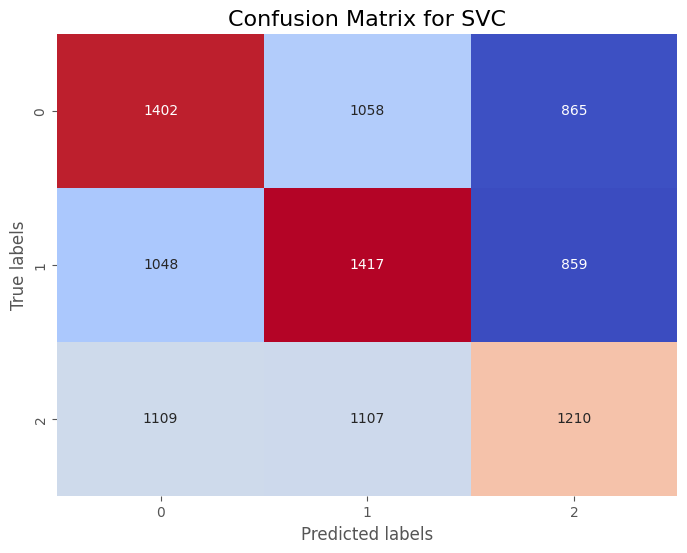

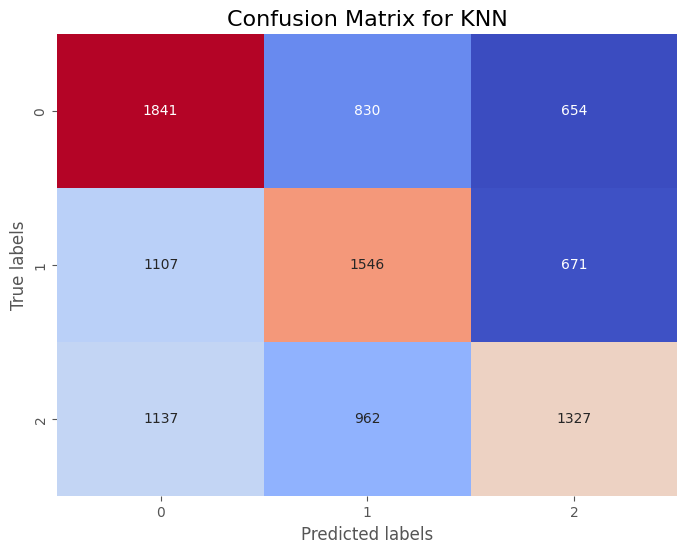

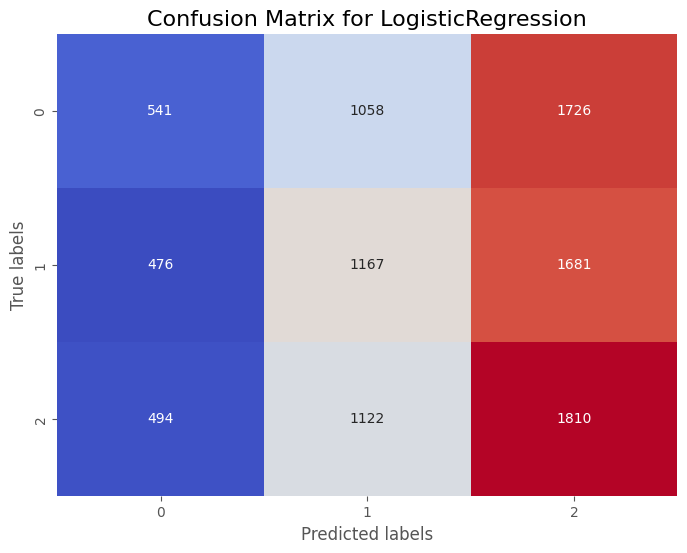

In [43]:
# Plot the confusion matrix

def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {model_name}', size=16)
    plt.show()
    
for cls in best_classifiers.keys():
    y_pred = best_classifiers[cls].predict(X)
    plot_confusion_matrix(y, y_pred, cls)

Απεικονίστε την παραπάνω αξιολόγηση με χρήση γραφήματος/γραφημάτων (π.χ. ιστόγραμμα, bar plot κατά προτίμιση της Matplotlib)

Σχολιάστε στην αναφορά σας το ποιο μοντέλο είχε την καλύτερη επίδοση. Ήταν αυτό αναμενόμενο με βάση τη θεωρία του 3.2 κεφαλαίου των σημειώσεών σας; Σχολιάστε επίσης την βελτίωση σε σχέση με την default υλοποίηση